## Business Case :- Create ML Model That Predict the Skin Diseases

## Introduction

The dataset consists of 366 records of 34 different features separated by a comma. When the features are examined, the features 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 and 34 contain the values of the clinical findings. Features between 12 and 33 contain the values of the histopathological findings. Except for the age feature number 34, all features between 1 and 33 have values between 0 and 3. Age feature has 8 unknown value and 358 values varying between 0 and 75. Number of patients are : Psoriasis 112 patients, Seborrheic dermatitis 61 patients, Lichen planus 72 patients, Pityriasis rosea 49 patients, Cronic dermatitis 52 patients, Pityriasis rubra pilaris 20 patients. Totally 366 patients available on dataset.

The clinical and histopathological features are explained as below.

Clinical features: (with values 0, 1, 2, 3)

1: Erythema (The severity of erythema in wounds)

2: Scaling (Squam, dandruff peeling off the skin, dandruff amount in the lesions)

3: Definite borders (Whether the wounds are sharply circumscribed)

4: Itching (Intensity of itching in wounds)

5: Koebner phenomenon (Limited manifestation of dermatological disease in the area of stimulation as a result of traumatic stimulation of the skin) [20]

6: Polygonal papules (Multi-edged, raised, less than 1 cm in diameter lesions on the skin)

7: Follicular papules (Swellings less than 1 cm in height, distributed at equal distances from each other)

8: Oral mucosal involvement (Lesions formation in the oral mucosa)

9: Knee and elbow involvement (Lesions formation on knees and elbows)

10: Scalp involvement (Lesions formation on the scalp)

11: Family history, (0 - 1) (Whether there is a family history)

34: Age (Have linear values)

Histopathological features: These are the findings obtained by biopsy taken from patients. (Values are in the range of 0, 1, 2, and 3)

12: Melanin incontinence (Brown granules that appear on the skin under the epidermis layer)

13: Eosinophils in the infiltrate (An increase in a type of white blood cell)

14: PNL infiltrate: Polymorphonuclear leukocyte spread. Migration and arrival of neutrophils to the disease site. Increase in the number of white blood cells of leukocytes, inflammation.

15: Fibrosis of the papillary dermis: Accumulation of new fibrotic material (collagen) due to disease in the papillary dermis layer of the skin.

16: Exocytosis: Accumulation of white blood cells towards the epidermis.

17: Acanthosis: Thickening of the epidermis layer.

18: Hyperkeratosis: Thickening of the keratin layer.

19: Parakeratosis: Nuclear cell formation in the keratin layer. 20: Clubbing of the rete ridges: Clubbing of the ridges of the rete.

21: Elongation of the rete ridges: Elongation of the ridges of the rete.

22: Thinning of the suprapapillary epidermis: Thinning of the epidermis over the papillary dermis. 23: Spongiform pustule: Spongy vesicles (pustules) filled with pus (neutrophils)

24: Munro microabcess: Small vesicles filled with neutrophils in the epidermis.

25: Focal hypergranulosis: Focal thickening of the granular layer of the epidermis. 26: Disappearance of the granular layer: Disappearance of the granular layer of the epidermis.

27: Vacuolisation and damage of basal layer: Formation of spongy cavities as a result of damage to the basal layer.

28: Spongiosis: Edema between epidermis cells.

29: Saw-tooth appearance of retes: Formation of rete ridges in a sawtooth appearance.

30: Follicular horn plug: Formation of plugs in hair follicles.

31: Perifollicular parakeratosis: Presence of nucleated cells around the hair follicle in the corneum layer.

32: Inflammatory mononuclear infiltrate: Migration of mononuclear inflammatory cells.

33: Band-like infiltrate: Migration of white blood cells in band appearance.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("PRCP-1028-Skin-Disorder-Prediction-20220512T101734Z-001.csv")

In [3]:
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


#### About Target Feature-Here class is our Target Feature.There are 6 different erythemato-squamous skin diseases in the data set.


1.psoriasis-112 patients,
2.Seborrheic dermatitis-61 patients,
3.Lichen planus-72 patients,
4.pityriasis Rosea-49 patients,
5.cronic dermatitis-52 patients,
6.pityriasis rubra pilaris-20 patients.

### Basic Checks

In [4]:
data.head() #checking First 5 Rows

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [5]:
data.tail() #checking last 5 rows

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,...,2,0,0,0,0,0,3,0,35,1


In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [7]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [8]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [9]:
data.Age.value_counts()

40    17
50    17
36    16
27    16
22    15
      ..
58     1
49     1
63     1
68     1
75     1
Name: Age, Length: 61, dtype: int64

### Visualise value counts

In [10]:
import warnings
warnings.filterwarnings('ignore')

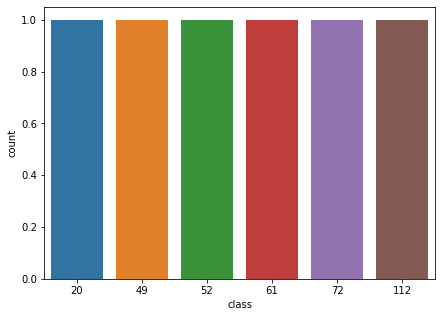

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(data['class'].value_counts())
plt.show()

### Exporatory Data Analysis

#### Univariate Analysis

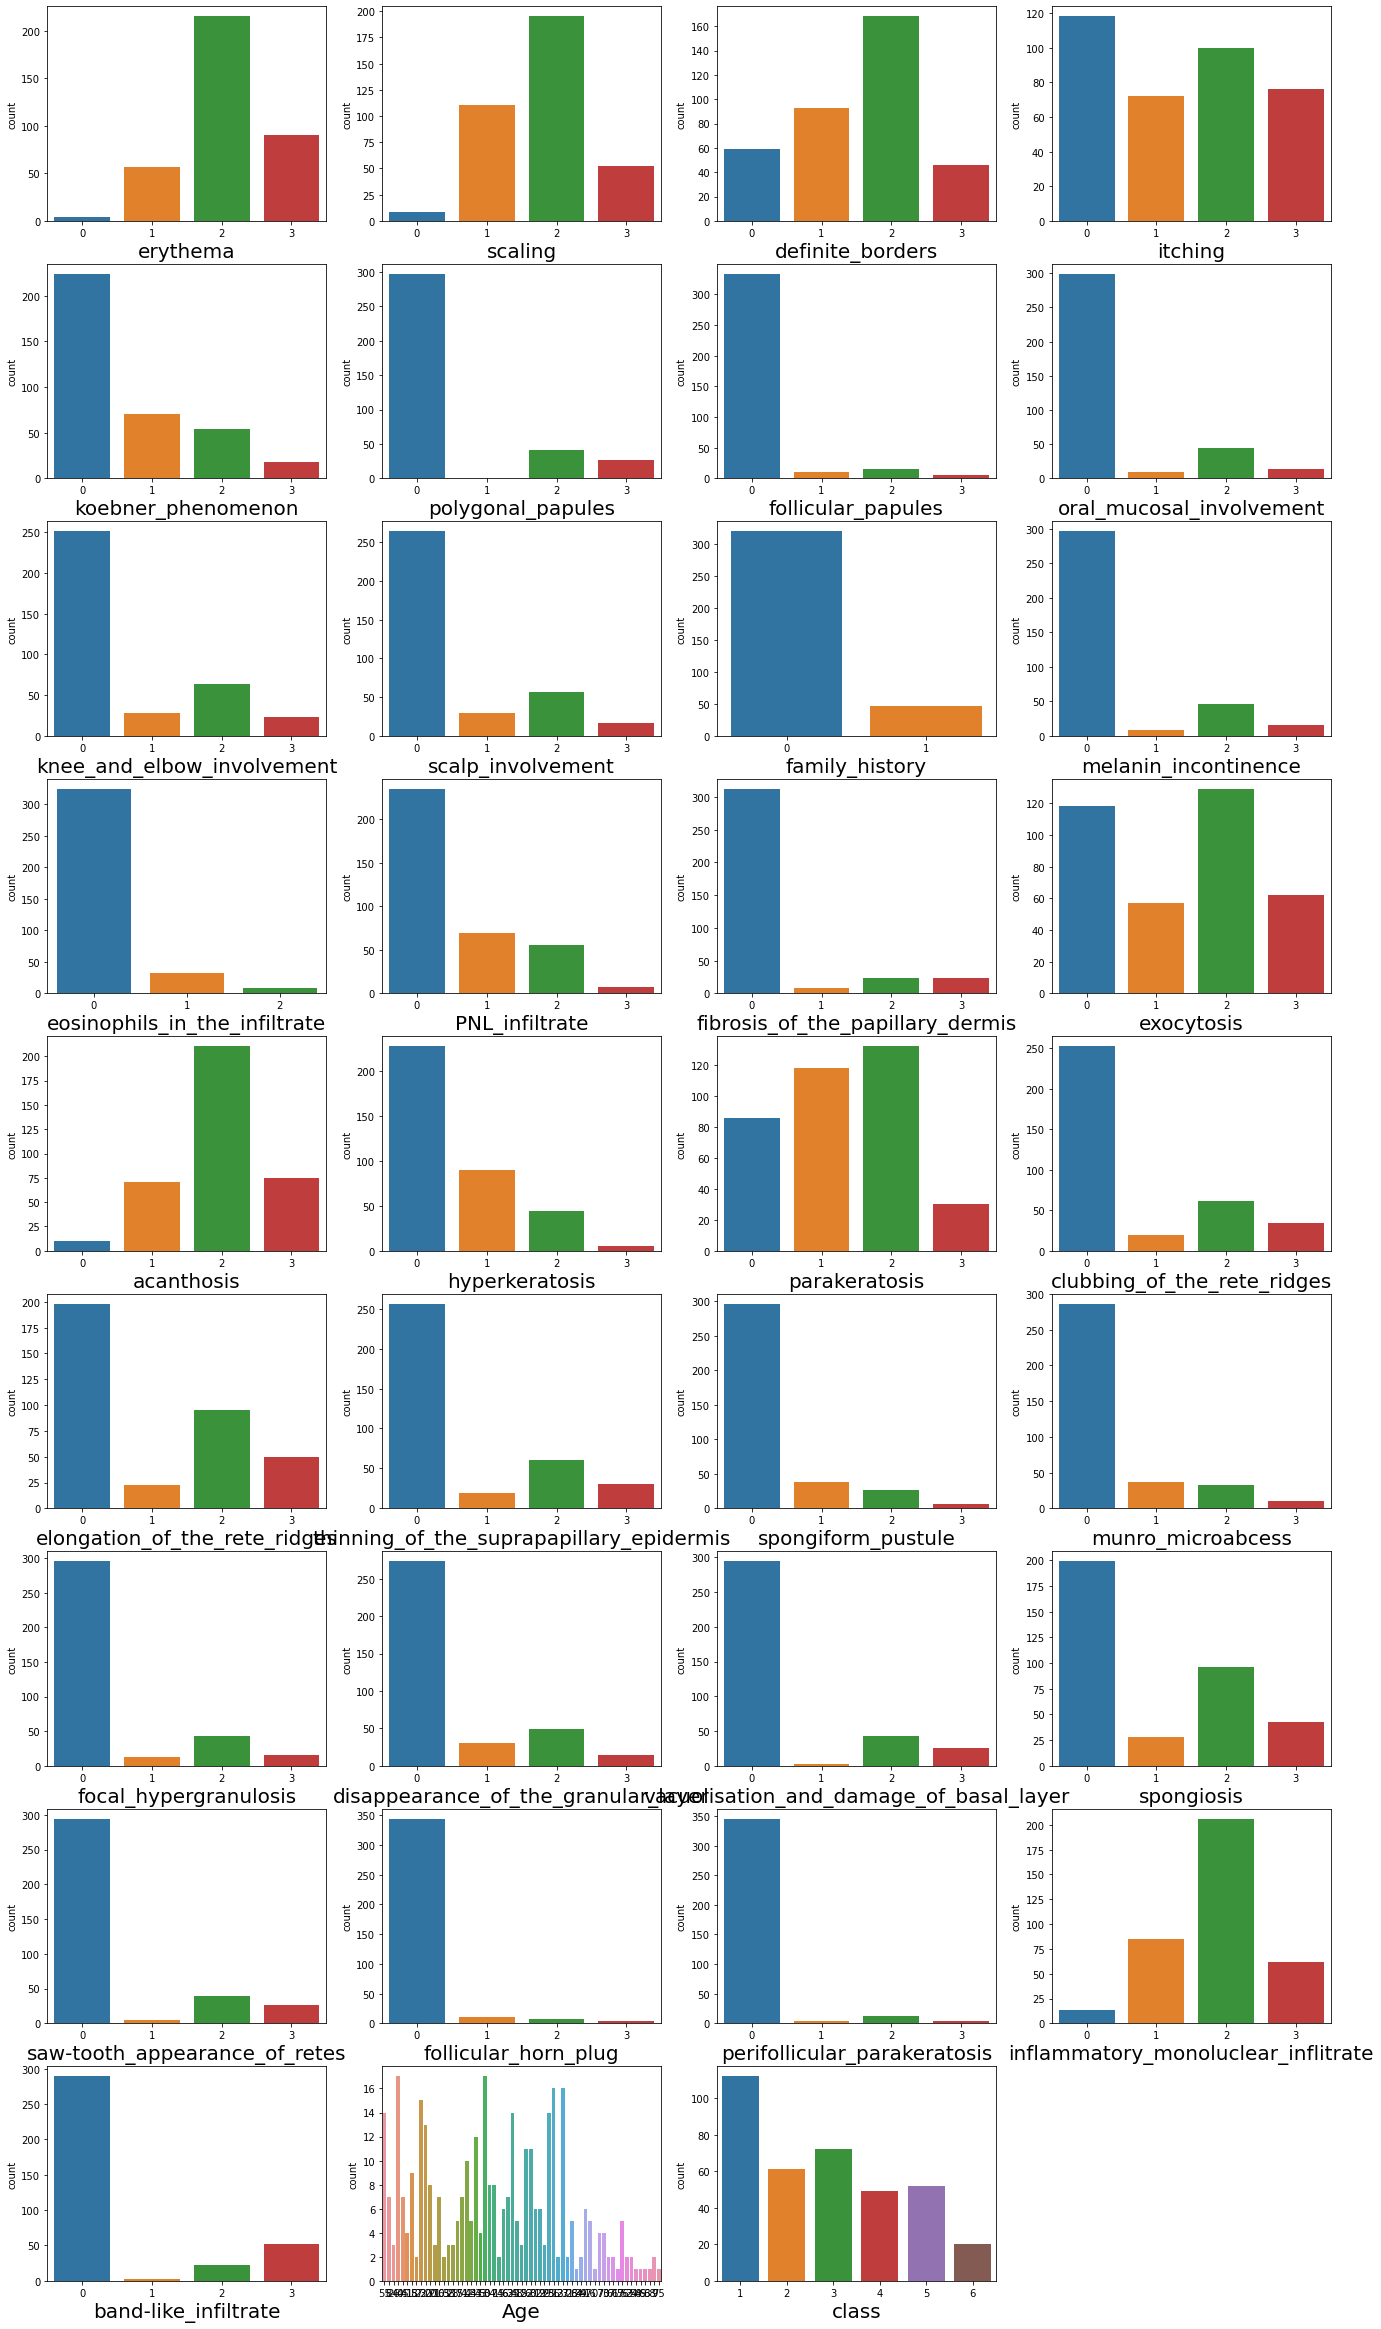

In [12]:
plt.figure(figsize=(23,75),facecolor='white')
plotnumber=1

for column in data:
    plt.subplot(16,4,plotnumber)
    sns.countplot(data[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.show()

#### Bivariate Aanlysis

##### Figure-1

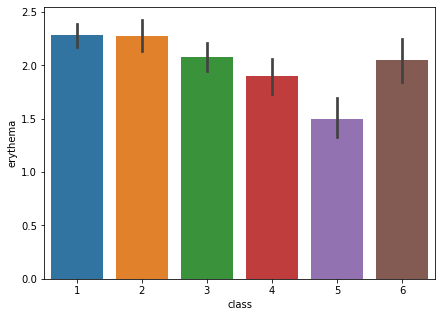

In [13]:
plt.figure(figsize=(7,5))
sns.barplot(x='class',y='erythema',data=data)
plt.show()

Erthema feature has the lowest incidence in chronic dermatitis

#### Figure-2

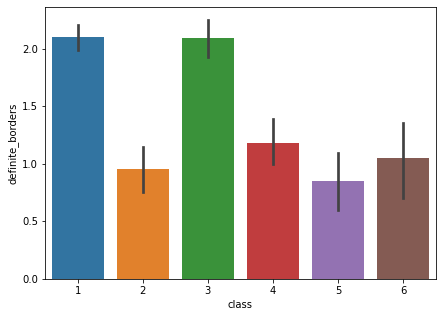

In [14]:
plt.figure(figsize=(7,5))
sns.barplot(x='class',y='definite_borders',data=data)
plt.show()

Highest rate in 1-psoriasis and 3-Lichen planus,with the lowest rate of 0.8 in 5-cronic dermatitis

#### Figure-3

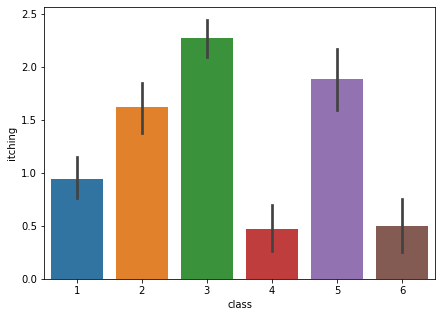

In [15]:
plt.figure(figsize=(7,5))
sns.barplot(x='class',y='itching',data=data)
plt.show()

The highest rate in 3-Lichen planus disease,with the lowest rate of 0.5 in 4-pityriasis Rosea and 6-pityriasis rubra pilaris diseases

#### Figure-4

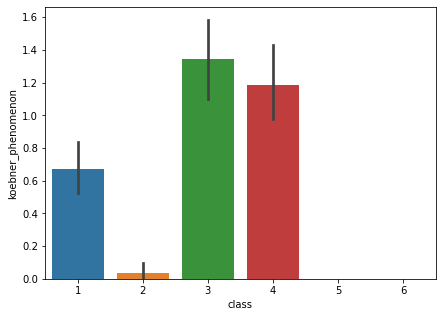

In [16]:
plt.figure(figsize=(7,5))
sns.barplot(x='class',y='koebner_phenomenon',data=data)
plt.show()

1-psoriasis,3-Lichen planus disease and 4-pityriasis Rosea,while it is not seen in other diseases such as 2-seborrheic dermatitis,5-cronic dermatitis and  6-pityriasis rubra pilaris diseases and does not have any value

#### Figure-5

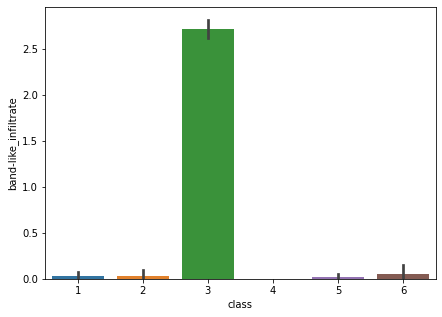

In [17]:
plt.figure(figsize=(7,5))
sns.barplot(x='class',y='band-like_infiltrate',data=data)
plt.show()

Only seen in 3-Lichen planus disease and has a rate of 2.7 in this disease

#### Figure-6

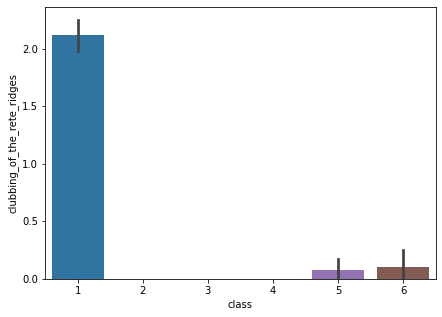

In [18]:
plt.figure(figsize=(7,5))
sns.barplot(x='class',y='clubbing_of_the_rete_ridges',data=data)
plt.show()

Only seen in 1-Psoriasis disease and has a rate of 2.1 in this disease.

#### Figure-7

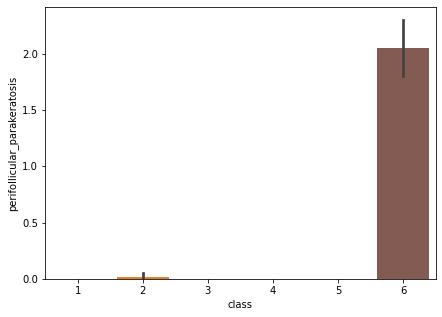

In [19]:
plt.figure(figsize=(7,5))
sns.barplot(x='class',y='perifollicular_parakeratosis',data=data)
plt.show()

only 6-pityriasis rubra pilaris diseases and has a rate of 2.0 in this diease.

#### Figure-8

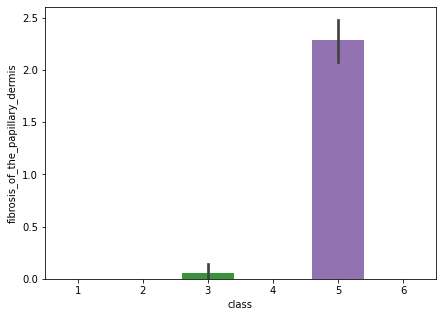

In [20]:
plt.figure(figsize=(7,5))
sns.barplot(x='class',y='fibrosis_of_the_papillary_dermis',data=data)
plt.show()






Only seen in 5.cronic dermatitis and has a rate of 2.3 in this disease.

#### Figure-9

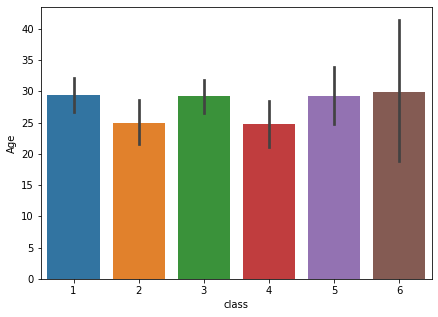

In [66]:
plt.figure(figsize=(7,5))
sns.barplot(x='class',y='Age',data=data)
plt.show()

While patients between the ages of 0-40 are observed in 1-Psoriasis disease,2-seborrheic dermatitis,3-Lichen planus,4-Pityriasis rosea and 5-cronic dermatitis,the age range of patients in 6-pityriasis rubra pilaris has values of age feature

#### Figure-10 -Statical average value of Age Feature

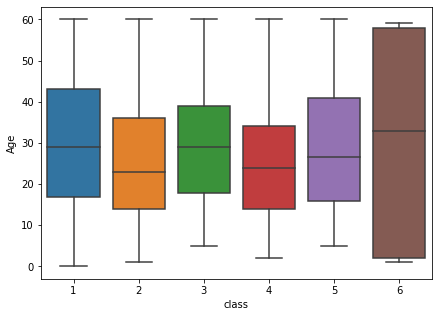

In [67]:
plt.figure(figsize=(7,5))
sns.boxplot(x='class',y='Age',data=data)

plt.show()

A statical graph was drawn instead of the mean values of the age ranges of the patients in the dataset.the value of a 22-year-old patient who was found to be outlier in 6-pityriasis rubra pilaris outside the 7-16 age range is shown as a in the 6th column. 

### Data Pre Processing

#### checking Null values

In [23]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

#### Handling Outliers

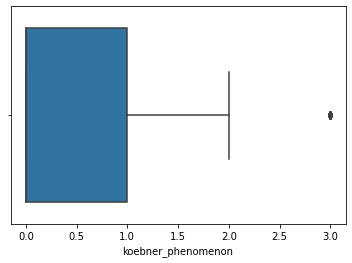

In [24]:
sns.boxplot(x=data.koebner_phenomenon)
plt.show()

In [25]:
#from IDR method
from scipy import stats


IQR=stats.iqr(data.koebner_phenomenon,interpolation='midpoint')

IQR

1.0

In [26]:
#min and max limit calculation
Q1=data.koebner_phenomenon.quantile(0.25)
Q3=data.koebner_phenomenon.quantile(0.75)

min_limit=Q1-1.5*IQR

max_limit=Q3-1.5*IQR


#### convert categorical feature into numerical

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Age=le.fit_transform(data.Age)

### Feature Selection

#### checking correlation

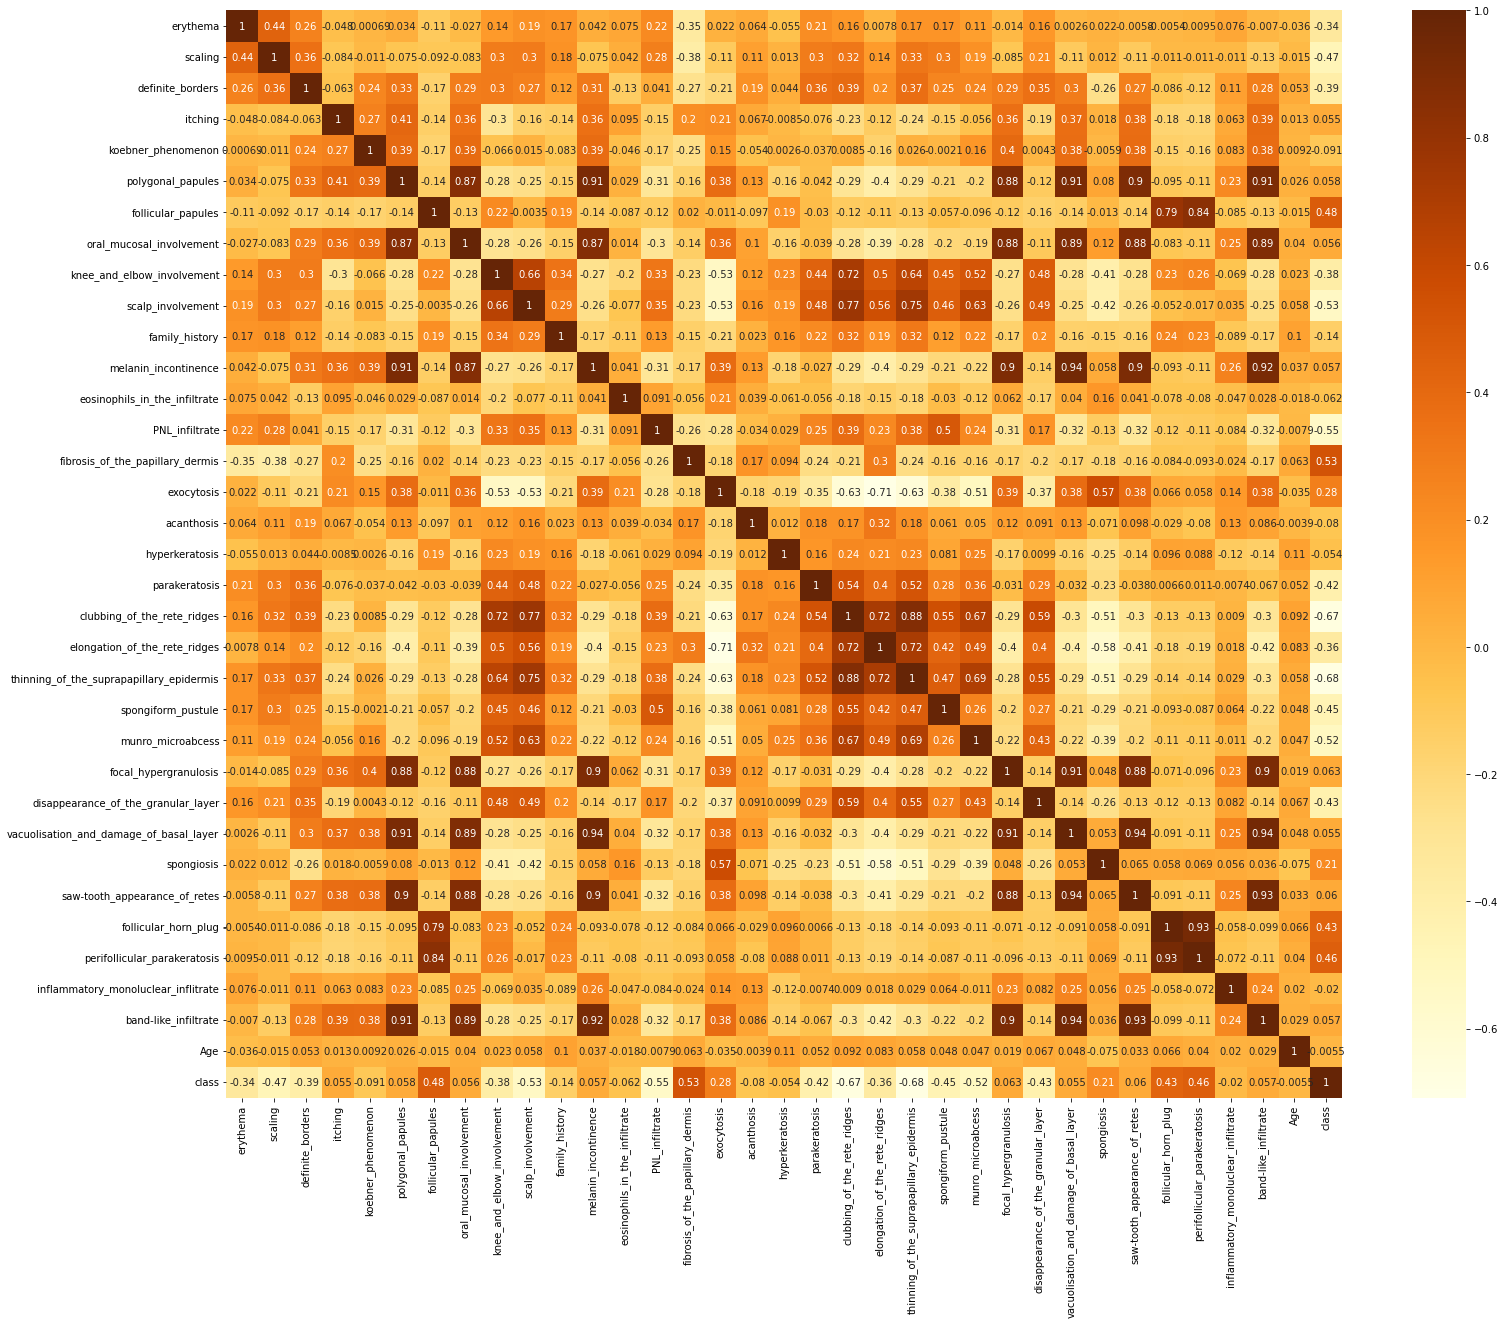

In [28]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),annot=True,cmap='YlOrBr')
plt.show()

#### checking constants

In [29]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,28.021858,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.450835,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,16.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,25.500000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,40.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,60.000000,6.000000


In [30]:
#scalling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#splitting independent and dependent Features
X=data.iloc[:,:-1]
y=data.iloc[:,34]
scaled=sc.fit_transform(X)

In [31]:
X

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,43
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,58
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,15
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,29
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,14
362,3,2,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,2,0,25
363,3,2,2,2,3,2,0,2,0,0,...,3,0,3,0,3,0,0,2,3,17
364,2,1,3,1,2,3,0,2,0,0,...,3,0,2,0,1,0,0,2,3,39


In [32]:
y

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64

In [33]:
## getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(data)

In [34]:
from collections import Counter # importing counter to check count of each label
from imblearn.over_sampling import SMOTE # for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# Checking count for each class
X_sm,y_sm=sm.fit_resample(X,y)#applying sampling on target variable
print(Counter(y_sm))# Checking count after sampling for each class

Counter({1: 112, 3: 72, 2: 61, 5: 52, 4: 49, 6: 20})
Counter({2: 112, 1: 112, 3: 112, 5: 112, 4: 112, 6: 112})


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [36]:
X_test.shape

(74, 34)

In [37]:
y_test.shape

(74,)

### Implimentation of Models

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression #importing Algorithm
LR=LogisticRegression() #creating object to the Algorithm
LR.fit(X_train,y_train) #train the Algorithm


LogisticRegression()

In [39]:
y_pred_LR=LR.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,classification_report #importing matrics to check model performance

In [41]:
acc_score=(accuracy_score(y_test,y_pred_LR)*100) # calculating the Accuracy score 
acc_score

98.64864864864865

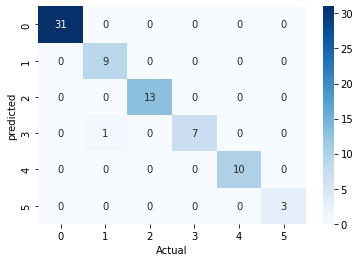

In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_LR)
plt.figure()
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

### KNN Model

In [43]:
## taking optimal k to determine how many nearest neighbors  to create
from sklearn.neighbors import KNeighborsClassifier

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

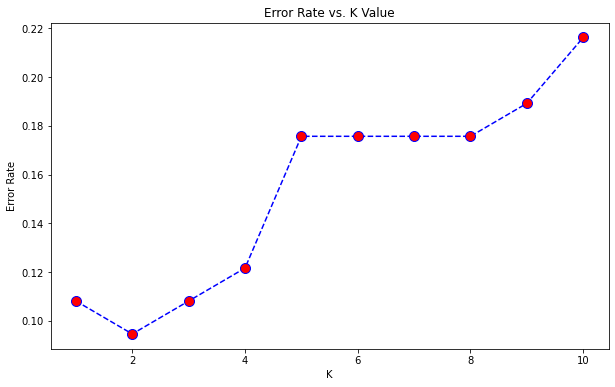

In [44]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [45]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=7) # importing Algorithm
knn.fit(X_train,y_train)# Predict 
y_pred = knn.predict(X_test)  #traing the Algorithm

In [46]:
# Checking Accuracy score
print('Knn_acc', accuracy_score(y_test,y_pred)*100)

Knn_acc 82.43243243243244


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        31
           2       0.50      0.78      0.61         9
           3       1.00      1.00      1.00        13
           4       0.43      0.38      0.40         8
           5       0.88      0.70      0.78        10
           6       0.67      0.67      0.67         3

    accuracy                           0.82        74
   macro avg       0.75      0.74      0.74        74
weighted avg       0.85      0.82      0.83        74



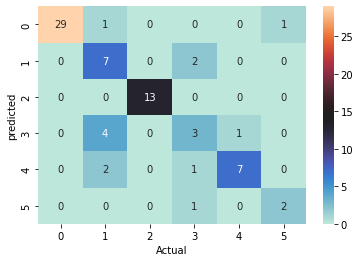

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cm,annot=True,cmap='icefire')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

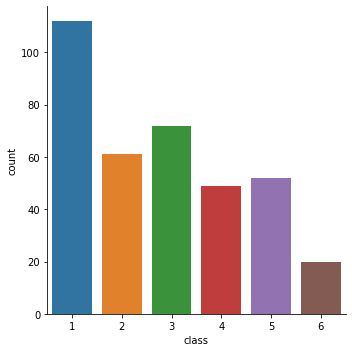

In [49]:
## checking the balance of target
sns.catplot(x='class',data=data,kind='count')

### SVM Model

In [50]:
from sklearn.svm import SVC # importing Algorithm
svm=SVC() #create object to the Algorithm
svm.fit(X_train,y_train) #train the model


SVC()

In [51]:
y_pred_sv=svm.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,classification_report # importing matrics to claculate the performance of model
acc_sv=(accuracy_score(y_test,y_pred_sv)*100)
acc_sv

75.67567567567568

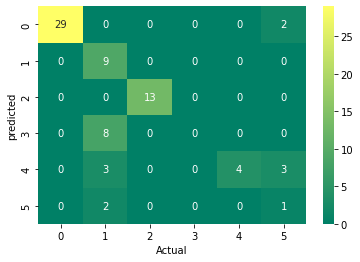

In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_sv)
plt.figure()
sns.heatmap(cm,annot=True,cmap='summer')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

### DesionTreeClassifier Model

In [54]:
from sklearn.tree import DecisionTreeClassifier #importing the Algorothm
DTC=DecisionTreeClassifier() #create object to the Algorithm
DTC.fit(X_train,y_train) #traing the Algorithm


DecisionTreeClassifier()

In [55]:
y_pred_dt=DTC.predict(X_test)

In [56]:
acc_dt=(accuracy_score(y_test,y_pred_dt)*100)
acc_dt

97.2972972972973

In [57]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         3

    accuracy                           0.97        74
   macro avg       0.99      0.96      0.97        74
weighted avg       0.97      0.97      0.97        74



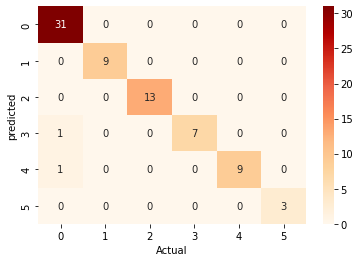

In [58]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_dt)
plt.figure()
sns.heatmap(cm,annot=True,cmap='OrRd')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

### XG Booster Model

In [59]:
from sklearn.ensemble import GradientBoostingClassifier #importing the Algortihm
XGB=GradientBoostingClassifier() #create object to the Algorithm
XGB.fit(X_train,y_train) # train the Algorithm

GradientBoostingClassifier()

In [60]:
y_pred_GB=XGB.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score,classification_report # importing matrics to calculate the performance of the model

In [62]:
acc_gb=(accuracy_score(y_test,y_pred_GB)*100)
acc_gb

100.0

In [63]:
#evaluating confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_GB)
cm

array([[31,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  3]], dtype=int64)

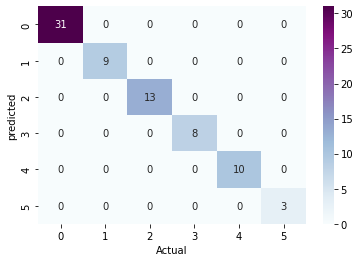

In [64]:
plt.figure()
sns.heatmap(cm,annot=True,cmap='BuPu')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

### Conclusion

 To predict Skin Disorder different techniques are applied Regression,Classification, Clustering and Desion Tree,XGbooster and their accuracy and performance has been compared.XGbooster model giving 100% accuracy score.

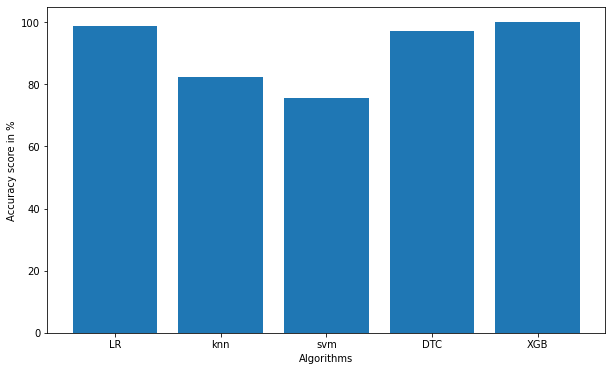

In [65]:
dt_algo={'LR':98.64,'knn':82.4,'svm':75.67,'DTC':97.29,'XGB':100}
algo=list(dt_algo.keys())
score=list(dt_algo.values())
plt.figure(figsize=(10,6))
plt.bar(algo,score)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy score in %')
plt.show()

#### Task3:-Suggestions

Many different machine learning methods are applied in the diagnosis of erythema squamous skin diseases. Each method classifies disease with reasonable accuracy.Clinical and histopathological data obtained from the patient are used in the diagnosis of the disease. The specialist doctor uses these data tomake the most appropriate diagnosis decision for the patient. With the experience of the medical profession, the specialist physician can decidewhether the erroneous data is compatible with the relevant disease and can eliminate the erroneous values

For individuals who are suitable for the ordinary course of life, the data in this dataset is suitable for machine learning methods. However, incases where pregnancy or other chronic diseases are accompanied, these methods will be insufficient.

